# $$Q3$$

---

In [1]:
import numpy as np
from scipy.special import gammaln as gln
from scipy.special import factorial as fact
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

font = {'size': 11}

matplotlib.rc('font', **font)


from scipy.optimize import minimize

In [2]:
# all units in cgs

z = np.array([0, 6, 12, 18]) * 10**(-4)
n = np.array([1880, 940, 530, 305])

r = 0.52 * 10**-4
rho = 0.063 
g = 980 
T = 293 #K

In [3]:
def logLikelihood(parameters):
    v_0, k = parameters
    a = (4 * np.pi * r**3 * rho * g)/(3*k*T)
    sum = 0
    
    for i in range(4):
        t1 = (-v_0 * np.exp(-a*z[i])) 
        t2 = n[i]*np.log(v_0)
        t3 = - (n[i]*a*z[i]) 
        t4 = - gln((n[i]))

        sum += (t1 + t2 + t3 + t4)
   
        
    return -sum

In [4]:
init_guess = [200, 1E-16]
bestfit = minimize(logLikelihood, init_guess, method = 'nelder-mead')

bestfit

 final_simplex: (array([[1.84494448e+03, 1.19870254e-16],
       [1.84494456e+03, 1.19870246e-16],
       [1.84494455e+03, 1.19870252e-16]]), array([-7.21908153, -7.21908153, -7.21908153]))
           fun: -7.219081528054403
       message: 'Optimization terminated successfully.'
          nfev: 135
           nit: 70
        status: 0
       success: True
             x: array([1.84494448e+03, 1.19870254e-16])

# Q3.b)

$$k_{B} \approx 1.20\cdot10^{-16} \text{ erg/K}$$
$$\nu_{0} \approx 1.84\cdot10^{3}$$

---

In [5]:
logLikelihood_max = logLikelihood((1.84494448e+03, 1.19870254e-16))

In [6]:
kb_list = np.linspace(1e-16, 1.4e-16, 500)
v_list = np.linspace(1400, 2350, 500)
logLikelihood_list = np.zeros([500, 500])

for (k_ind, k) in enumerate(kb_list):
    for (v_ind, v) in enumerate(v_list):
        logLikelihood_list[v_ind][k_ind] = -logLikelihood((v, k))

In [7]:
sigma_array = []
for sigma in range(2):
    sigma_array.append(-logLikelihood_max - 0.5*sigma**2)
sigma_array = sigma_array[::-1]

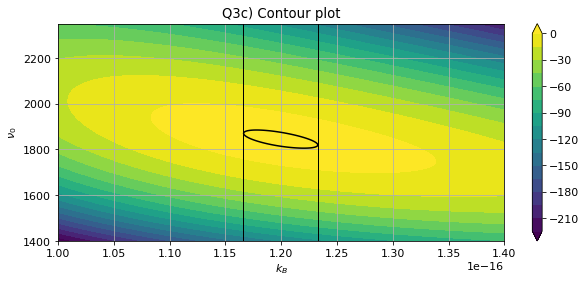

In [8]:
t = np.linspace(0, 200, 50)
fig, ax = plt.subplots(1,1, figsize = (10,4))

filledContour = ax.contourf(kb_list, v_list, logLikelihood_list, levels = 20, extend = 'both')
ax.contour(filledContour, levels = sigma_array, extend = 'both', colors = 'black')
#ax.axhline(1.20*10**-16, linewidth=2, color='black')
ax.axvline(1.166E-16, linewidth=1, color='black')
ax.axvline(1.233E-16, linewidth=1, color='black')
ax.grid()
ax.set_ylabel(r'$\nu_{0}$')
ax.set_xlabel(r'$k_{B}$')
ax.set_title('Q3c) Contour plot')
fig.colorbar(filledContour, ax = ax)

In [9]:
print('Error = +' + str(bestfit.x[1] - 1.166E-16) + ' or ' + str(bestfit.x[1] - 1.233E-16) + '.')

Error = +3.270253881000614e-18 or -3.4297461189993766e-18.


# Q3.c)

$$k_{B} \approx 1.20_{-0.034}^{+0.033}\cdot10^{-16}\text{ erg/K}$$